In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fudebako

In [2]:
def plot_iv(t0, axes, prev1=None, prev2=None):
    (s0_1, t_1, op_df1, full_price1), (
        s0_2,
        t_2,
        op_df2,
        full_price2,
    ) = fudebako.get_fop_data(t0)
    axes.plot(op_df1.index, op_df1["iv"], color="#1f77b4")
    axes.plot(op_df2.index, op_df2["iv"], color="#ff7f0e")
    axes.set_xlim(12500, 26000)
    axes.set_ylim(0.15, 1)
    yticks = axes.axes.get_yticks()

    s0_1_prev = np.nan
    if prev1 and prev2:
        (s0_1_prev, t_1_prev, op_df1_prev), (s0_2_prev, t_2_prev, op_df2_prev) = (
            prev1,
            prev2,
        )
        axes.plot(op_df1_prev.index, op_df1_prev["iv"], linestyle="--", color="#1f77b4")
        axes.plot(op_df2_prev.index, op_df2_prev["iv"], linestyle="--", color="#ff7f0e")
        yticks = axes.axes.get_yticks()
        axes.vlines(s0_1_prev, yticks[0], yticks[-1], linestyle="--", linewidth=1)
        axes.set_title(
            "{:%m-%d} f1:{} -> {}({:+.2f})".format(
                t0, s0_1_prev, s0_1, s0_1 - s0_1_prev
            )
        )
    else:
        axes.set_title("{:%m-%d} f1:{}".format(t0, s0_1))

    axes.vlines(s0_1, yticks[0], yticks[-1], linestyle="-", linewidth=1)
    return (s0_1, t_1, op_df1), (s0_2, t_2, op_df2)


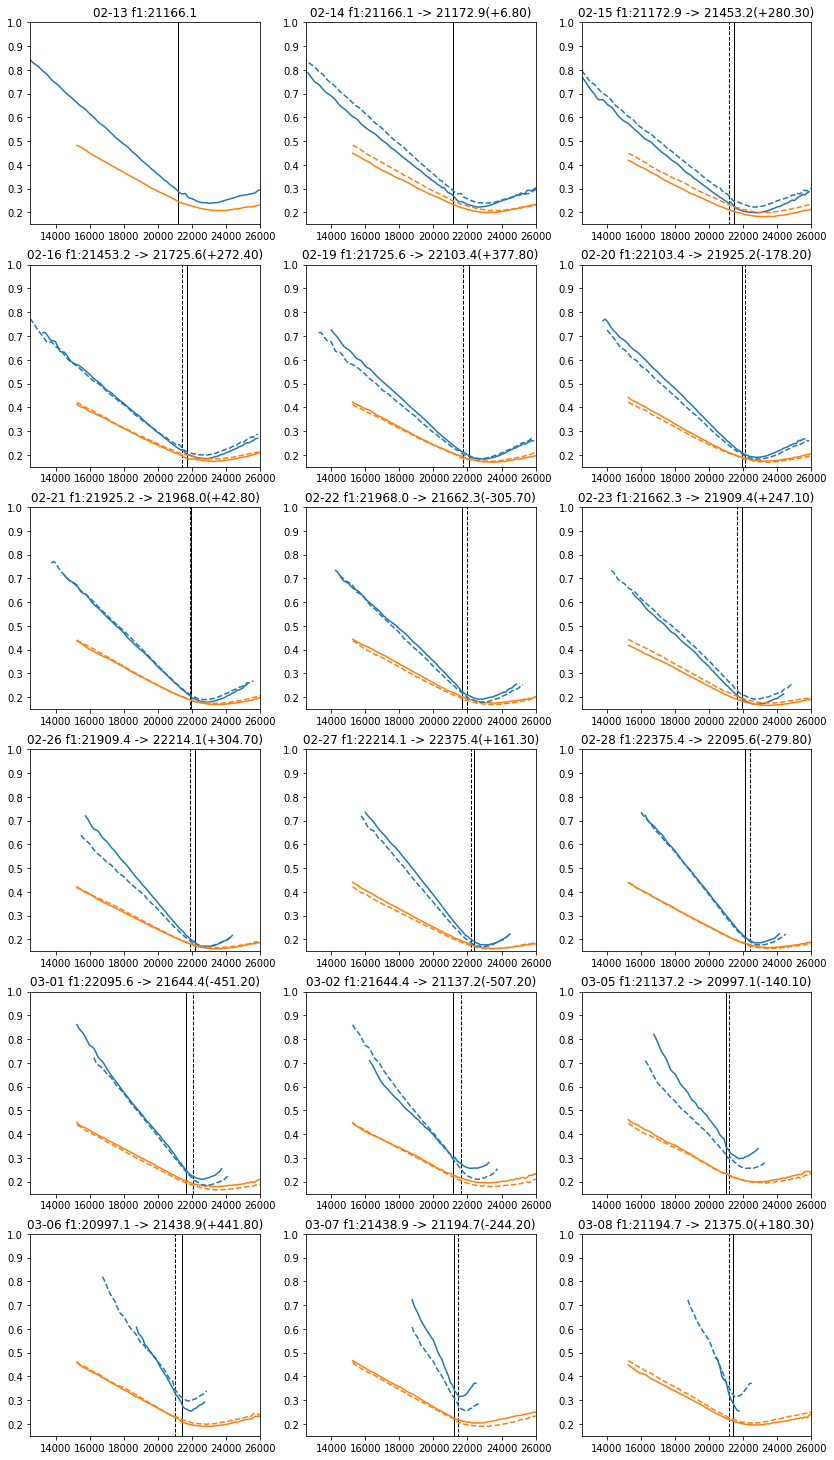

In [3]:
fig = plt.figure(figsize=(14, 26))
ax = [fig.add_subplot(6, 3, i) for i in range(1, 19)]
prev1, prev2 = None, None
for i, t0 in enumerate(fudebako.s_df.index):
    prev1, prev2 = plot_iv(t0, ax[i], prev1, prev2)
plt.show()

In [4]:
from ipywidgets import interact

In [5]:
@interact(n=(0, len(fudebako.s_df.index) - 1))
def plot_iv_by_num(n=0):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1)
    prev1, prev2 = plot_iv(fudebako.s_df.index[n], ax)
    plt.show()

interactive(children=(IntSlider(value=0, description='n', max=17), Output()), _dom_classes=('widget-interact',…